In [22]:
import sys
import os
import numpy as np
import pandas as pd

# 将项目根目录添加到 sys.path
#current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from training import train, train_per_iteration
import torch
from utils import ring1, show_row 

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n=16
A, B = ring1(n=n)
k = 20
A = np.linalg.matrix_power(A, k)
show_row(A)
print(A.shape)

A的第二大特征值: 0.2736096688545816
A的beta: 0.33741181898392
A的spectral gap: 0.6625881810160801
A的kappa: 2.000000000000001
S_A是: 20.44282984901423 

(16, 16)


In [4]:
train_per_iteration(
    algorithm="PullDiag_GT",
    lr=5e-3,
    A=A,
    dataset_name="MNIST",
    batch_size=128,
    num_epochs=10,
    remark="MG=1, ring1",
)

A的第二大特征值: 0.9372524233963279
A的beta: 0.9808005431766286
A的spectral gap: 0.01919945682337143
A的kappa: 2.000000000000017
S_A是: 705.4979507540617 

(16, 16)
每个节点分配到的图片数目是 3125
每个epoch执行的iteration次数是 30
optimizer初始化成功!


Training Progress: 100%|██████████| 10/10 [08:07<00:00, 48.77s/it, epoch=10, test_accuracy=72.6700%, test_loss=1.1856, train_average_accuracy=72.2500%, train_loss=1.4160]


,epoch,batch,iteration,train_loss(total),train_loss(average),train_accuracy(average),test_loss(average),test_accuracy(average)
0,1,1,1,2.3631,2.3024,0.1101,2.3022,0.1101
1,1,2,2,2.3495,2.3024,0.1124,2.3022,0.1135
2,1,3,3,2.3409,2.3024,0.1124,2.3022,0.1135
3,1,4,4,2.3386,2.3024,0.1124,2.3022,0.1135
4,1,5,5,2.3258,2.3023,0.1124,2.3022,0.1135
...,...,...,...,...,...,...,...,...
295,10,26,296,1.4274,1.2083,0.7218,1.1968,0.7265
296,10,27,297,1.4028,1.2058,0.7219,1.1940,0.7264
297,10,28,298,1.4415,1.2034,0.7215,1.1915,0.7261
298,10,29,299,1.4133,1.2008,0.7219,1.1889,0.7264


In [23]:
df1 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=1,_ring1_PullDiag_GT_lr=0.005_n=16_bs=128_2025-01-25.csv")
df2 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=2,_ring1_PullDiag_GT_lr=0.005_n=16_bs=128_2025-01-25.csv")
df3 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=5,_ring1_PullDiag_GT_lr=0.005_n=16_bs=128_2025-01-25.csv")
df4 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=10,_ring1_PullDiag_GT_lr=0.005_n=16_bs=128_2025-01-25.csv")
df5 = pd.read_csv("/root/GanLuo/ICML2025_project/outputs/MNIST数据_MG/csv/MG=20,_ring1_PullDiag_GT_lr=0.005_n=16_bs=128_2025-01-25.csv")

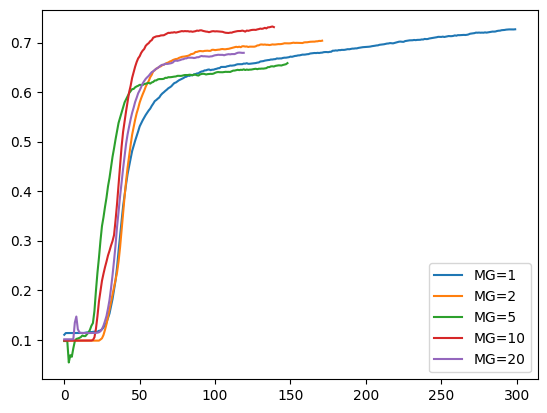

In [27]:
import matplotlib.pyplot as plt
plt.plot(df1["test_accuracy(average)"], label="MG=1")
plt.plot(df2["test_accuracy(average)"], label="MG=2")
plt.plot(df3["test_accuracy(average)"], label="MG=5")
plt.plot(df4["test_accuracy(average)"], label="MG=10")
plt.plot(df5["test_accuracy(average)"], label="MG=20")
plt.legend()
plt.show()